# [SciPy](https://docs.scipy.org/doc/scipy/reference/)
[SciPy](http://cs231n.github.io/python-numpy-tutorial/#numpy-array-indexing) provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications such as:
1. [Custering](https://docs.scipy.org/doc/scipy/reference/cluster.html).
2. [Discrete Fourier Analysis](https://docs.scipy.org/doc/scipy/reference/fftpack.html).
3. [Interpolation](https://docs.scipy.org/doc/scipy/reference/interpolate.html).
4. [Linear algebra](https://docs.scipy.org/doc/scipy/reference/linalg.html).
5. [Signal](https://docs.scipy.org/doc/scipy/reference/signal.html) and [Image processing](https://docs.scipy.org/doc/scipy/reference/ndimage.html).
6. [Optimization](https://docs.scipy.org/doc/scipy/reference/optimize.html).
7. [Sparse matrix](https://docs.scipy.org/doc/scipy/reference/sparse.html) and [sparse linear algebra](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html).



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Optimization-example" data-toc-modified-id="Optimization-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Optimization example</a></span></li></ul></div>

## Classification with SVM

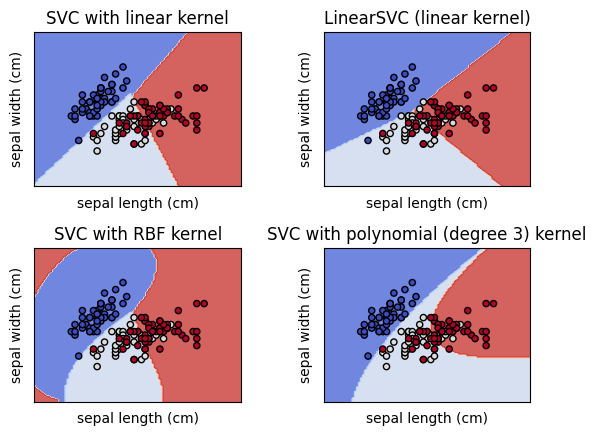

In [8]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()